# MTpy Example 07

## Resistivity and Phase Pseudosections

A pseudosection plot distance on the x-axis and period on the y-axis.  This provides a plot that is an proxy for structures at depth. You will see obvious static shifts and suspect data.  The phase is often better to analyze because it is invariant to static shifts.

In [1]:
from pathlib import Path
from mtpy import MTCollection
%matplotlib widget

### Open MTCollection

In the previous example we created a MTH5 file from existing Musgraves data.  Let's open that file here to plot some profiles as pseudosections.  We have chosen the line of `SAA27#`.

In [2]:
%%time
with MTCollection() as mc:
    mc.open_collection(Path(r"../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5"))
    mc.working_dataframe = mc.master_dataframe[mc.master_dataframe.station.str.startswith("SAA27")]
    dgh_mt_data = mc.to_mt_data()

23:11:14T09:13:10 | INFO | line:760 |mth5.mth5 | close_mth5 | Flushing and closing ../../../scratch/nm05/jp0633/musgraves_edis/musgraves_tf.h5
CPU times: user 2.24 s, sys: 22.5 ms, total: 2.26 s
Wall time: 2.27 s


## Set the UTM CRS

Because we are plotting a profile line the UTM CRS needs to be set so that estimation of meters can be calculated to place the stations in the correct location along the profile.  We will use the GDA2020 datum which has an EPSG number of 28353.

In [3]:
dgh_mt_data.utm_crs = 28353

## Plot Resistivity and Phase Pseudosection 

/opt/conda/envs/geophys/lib/python3.9/site-packages/mtpy/imaging/plot_pseudosection.py:395: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(


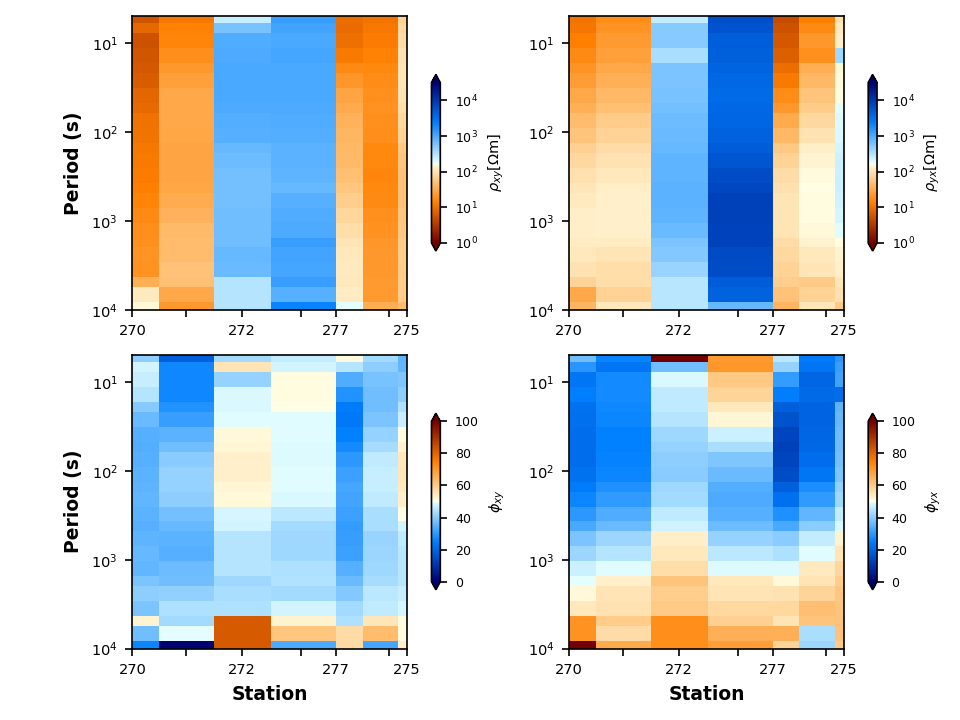

In [13]:
plot_rp_pseudosection = dgh_mt_data.plot_resistivity_phase_pseudosections( 
    fig_num=1, 
    profile_reverse=True,
    station_id=[3, None],
    station_step=2,
    y_stretch=8,
    x_stretch=.01,
    cmap_limits={
            "res_xx": (-1, 2),
            "res_xy": (0, 4.5),
            "res_yx": (0, 4.5),
            "res_yy": (-1, 2),
            "res_det": (0, 4.5),
            "phase_xx": (-180, 180),
            "phase_xy": (0, 100),
            "phase_yx": (0, 100),
            "phase_yy": (-180, 180),
            "phase_det": (0, 100),
        }
)

### Adjust Interpolation

If you want to try to minimize the bad data points we can play around with interpolation methods and median filtering.  This should be done with caution in that the stations are spaced equally which can make weighting unnatural.  

##### Cubic Spline interpolation

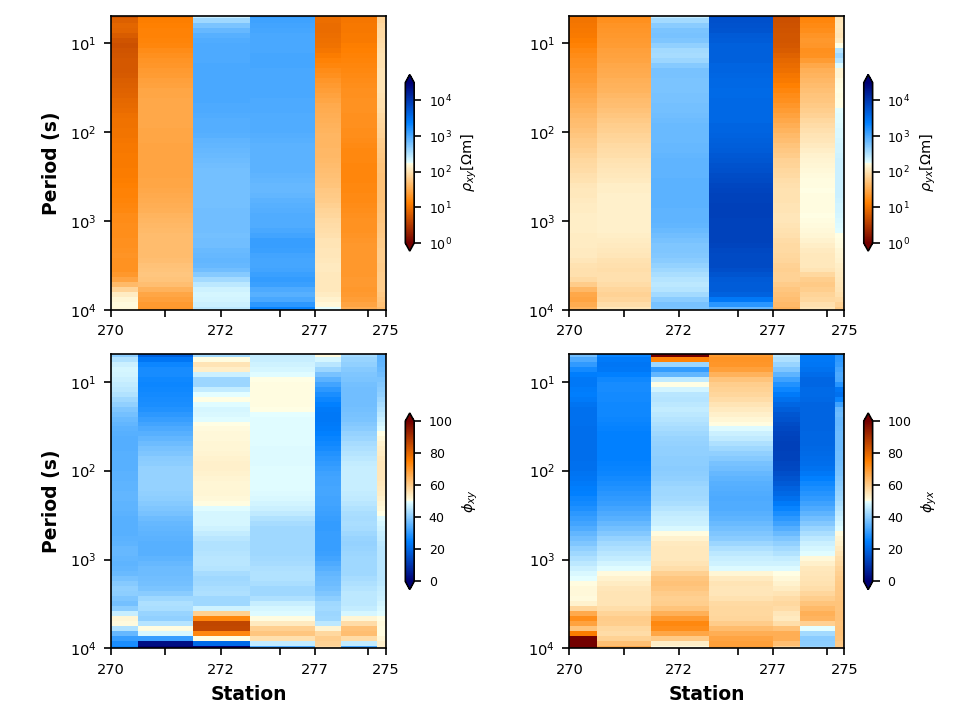

In [14]:
plot_rp_pseudosection.interpolation_method = "cubic"
plot_rp_pseudosection.fig_num = 2
plot_rp_pseudosection.redraw_plot()

##### Median Filter 2D

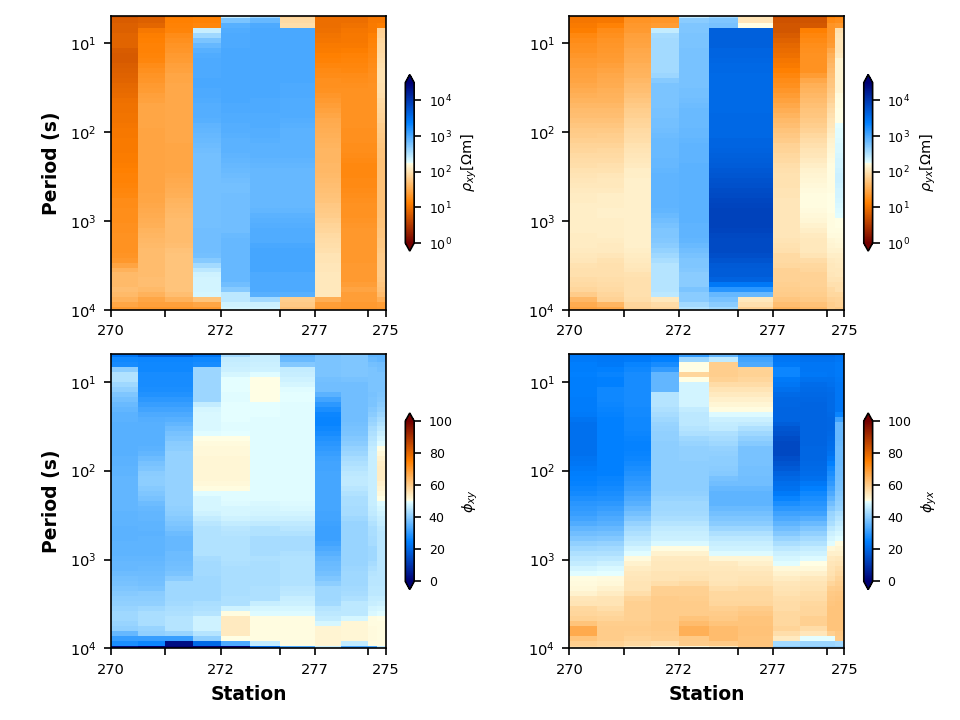

In [15]:
plot_rp_pseudosection.median_filter_kernel = (9, 5)
plot_rp_pseudosection.fig_num = 3
plot_rp_pseudosection.redraw_plot()

##### Delaunay Triangulation

/opt/conda/envs/geophys/lib/python3.9/site-packages/mtpy/imaging/plot_pseudosection.py:421: UserWarning: Passing the keyword 'mask' has no effect when also passing a Triangulation
  im = ax.tricontourf(
/opt/conda/envs/geophys/lib/python3.9/site-packages/mtpy/imaging/plot_pseudosection.py:421: UserWarning: The following kwargs were not used by contour: 'mask'
  im = ax.tricontourf(


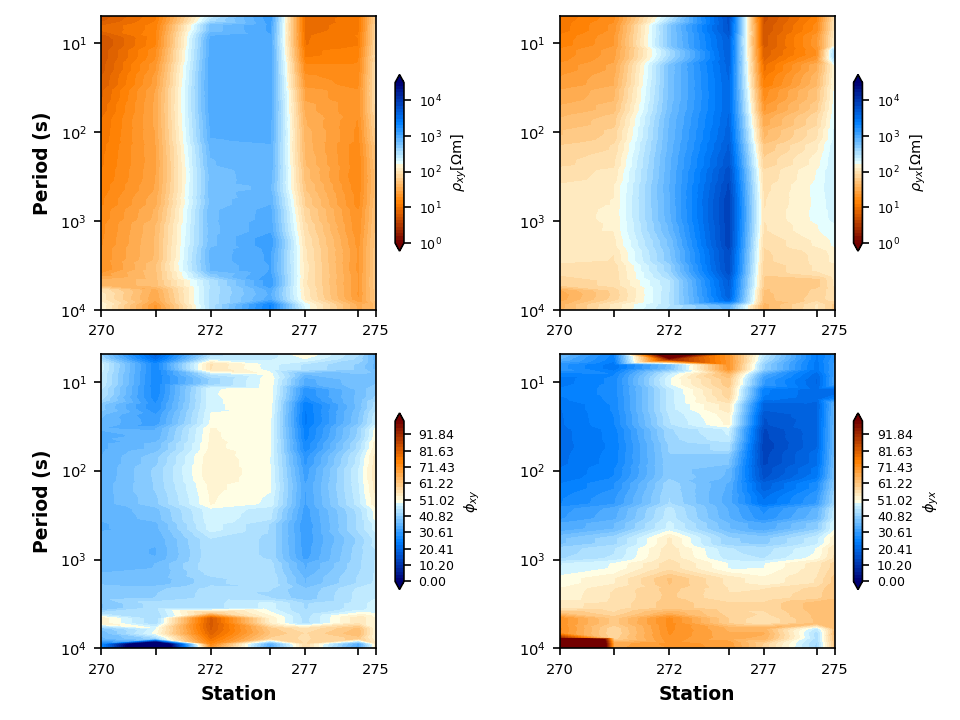

In [16]:
plot_rp_pseudosection.interpolation_method = "delaunay"
plot_rp_pseudosection.fig_num = 4
plot_rp_pseudosection.redraw_plot()

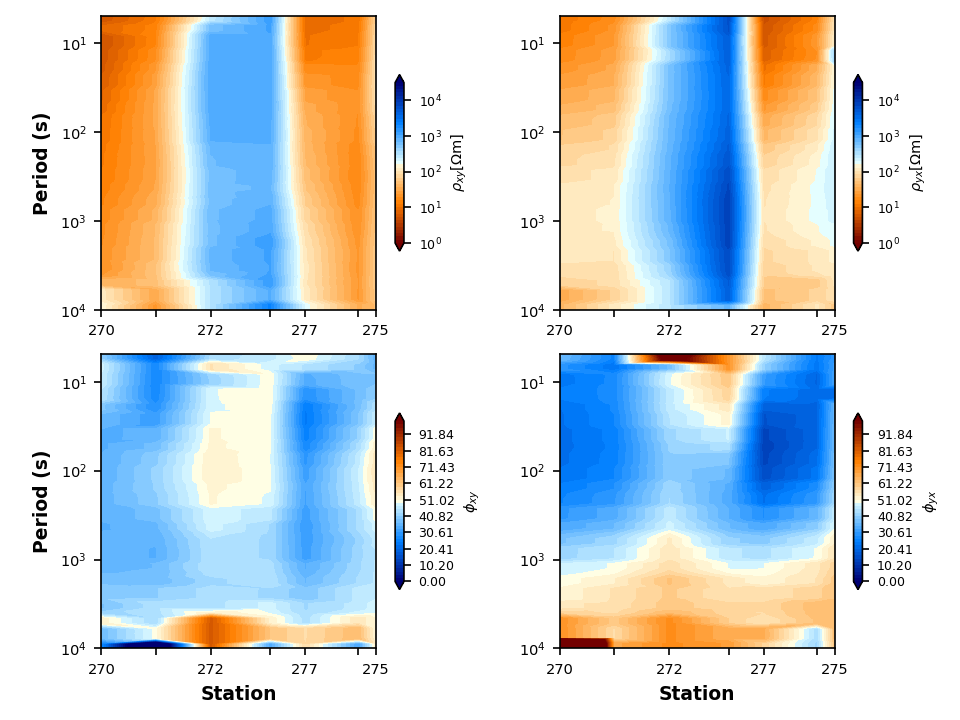

In [17]:
plot_rp_pseudosection.interpolation_power = 13
plot_rp_pseudosection.nearest_neighbors = 5
plot_rp_pseudosection.fig_num = 5
plot_rp_pseudosection.redraw_plot()